<a href="https://colab.research.google.com/github/JeromeMberia/user_review_analysis/blob/main/user_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

## Installing Libraries

In [ ]:
# Installing required packages. 
!pip install wordnet
!pip install wordninja  # used to  split concatenated words into separate words
!pip3 install textblob
!pip install nltk
!pip install textstat


## Importing Libraries

In [ ]:
# Importing our Essential Libraries
import pandas as pd      # library for data manipulation and analysis
import numpy as np       # library for performin scientific computations
import matplotlib.pyplot as plt  # library for performin scientific computations
import seaborn as sns            # library for creating rich data visualisations


from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import nltk

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk import word_tokenize, ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import wordninja 
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
import spacy #for training the NER model tokenize words
import random
from collections import Counter
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Dataset

## Reading the dataset

In [ ]:
#uploading and readin the dataset
data = pd.read_csv("/content/user_review_data.csv")
data.head()

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1


## Checking the Data

In [ ]:
#checking the top 5 rows
data.head()

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1


In [ ]:
#checking the bottom 5 rows
data.tail()

,review_body,star_rating
14995,"I have a TAG Heuer carrera twin time watch, wh...",5
14996,It is hard sometimes to judge a product by its...,5
14997,reloj en perfecto estado llego todo a tiempo l...,5
14998,This is my third ironman. There are more expe...,5
14999,i use it everyday,5


Observation: the data dataset is uniform from top to the borrom. 

In [ ]:
#Getting the dataset shape.
data.shape

(15000, 2)

Observation: dataset has 15000 records and two variables/field/colunms. 

In [ ]:
##Get the summary of this dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_body  15000 non-null  object
 1   star_rating  15000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


observation: our dataset comprise of object and integer datatype. both colunms has 15000 values, this is a clue of no missing values. 

In [ ]:
#checking the body_review variable values
data['review_body'].sample(n=10, random_state=610)

3293     The delivery was prompt. I got the correct pro...
5328                                    not silent running
13737                                         good quality
3751     not happy<br /><br />  the band is very stiff ...
14280                                            Excellent
7552                 A backlight would be a useful feature
13104    So far so good with this product. My fiancée i...
11599    This is a nice watch, however it is a little h...
6004     IT IS OK. SEEMS TO BE A GOOD QUALITY. I RECOME...
2401     Similar to this watch. Undelivered to this dat...
Name: review_body, dtype: object

observation: the values comprises of words, symbols, panctuations and so on.

In [ ]:
#Using groupby will check the data
data.groupby('star_rating').describe()

review_body                       
                  count unique        top freq
star_rating                                   
1                  3000   2935        bad    3
2                  3000   2896         ok    4
3                  3000   2905       good    7
4                  3000   2929       Good   11
5                  3000   2896  Excellent    8

observation: this is the preview of dataset based on the rating. all the star rating have similar value count. 

In [ ]:
#previewing the dataset variables
data.columns

Index(['review_body', 'star_rating'], dtype='object')

observation: the two colunms are, review_body, and star_rating

# Data cleaning

Here we will check for remove any unnecessary variables/features/columns if any, duplicates and  other preprocessing procedures are tokenizing(spliting), and lemmatization.




## Duplicate

In [ ]:
#Checking for duplicates
data.duplicated().sum()

439

observation: there are 439 duplicates.

In [ ]:
#dropping the duplicates
data.drop_duplicates(inplace=True)
#
#confirming no duplicates
data.duplicated().any()

False

observation: duplicates have been dropped.

## Null Value

In [ ]:
#checking for the missing values
data.isnull().sum()

review_body    0
star_rating    0
dtype: int64

observation: there is no missing values

## Pre Processing the Data

In [ ]:
bag_of_words = data.copy()

In [ ]:
#Removing panctuation, HTML, words containing numbers, and changing the whole review to lower case.
import re # this is library for regular expressions, we write our pre-processing function:
def clean_text_round1(text):
  '''Remove HTML tags, remove punctuation, make text lowercase, remove punctuation and remove words containing numbers.'''
  text = re.sub('<.*?>','', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = text.lower()
  text = re.sub('\d', '', text)
  return text

fix = lambda x: clean_text_round1(x)
bag_of_words['review_body'] = pd.DataFrame(bag_of_words.review_body.apply(fix))
bag_of_words

,review_body,star_rating
0,good luck finding a reasonably priced band rep...,1
1,no i get dark on the first week with me i will...,1
2,i dont know if mine was a mistake but it clear...,1
3,the rod that holds the bracelet broke several ...,1
4,i bought watches one watch doesnot work at a...,1
...,...,...
14995,i have a tag heuer carrera twin time watch who...,5
14996,it is hard sometimes to judge a product by its...,5
14997,reloj en perfecto estado llego todo a tiempo l...,5
14998,this is my third ironman there are more expen...,5


In [ ]:
# Finding Rare and unique Words

rare_words= pd.Series(' '.join(data.review_body).split()).value_counts()[-100:]
rare_words

/>GREAT          1
dial...so        1
result:          1
requirements:    1
nefew            1
                ..
$30.00!!         1
PLEXI            1
FREE             1
green[good]      1
glow\\".         1
Length: 100, dtype: int64

In [ ]:
#import wordninja 
from textblob import TextBlob

# Performing our splitting 

# 
bag_of_words['review_body'] = bag_of_words.review_body.apply(lambda x: wordninja.split(str(TextBlob(x))))  
bag_of_words['review_body'] = bag_of_words['review_body'].apply(lambda x: ' '.join(x))
print(bag_of_words.head())

                                         review_body  star_rating
0  good luck finding a reasonably priced band rep...            1
1  no i get dark on the first week with me i will...            1
2  i dont know if mine was a mistake but it clear...            1
3  the rod that holds the bracelet broke several ...            1
4  i bought watches one watch does not work at al...            1


In [ ]:
bag_of_words['review_body'] = bag_of_words['review_body'].apply(nltk.word_tokenize)
bag_of_words['review_body']

0        [good, luck, finding, a, reasonably, priced, b...
1        [no, i, get, dark, on, the, first, week, with,...
2        [i, dont, know, if, mine, was, a, mistake, but...
3        [the, rod, that, holds, the, bracelet, broke, ...
4        [i, bought, watches, one, watch, does, not, wo...
                               ...                        
14995    [i, have, a, tag, heuer, carrera, twin, time, ...
14996    [it, is, hard, sometimes, to, judge, a, produc...
14997    [rel, oj, en, perfect, o, estado, l, lego, to,...
14998    [this, is, my, third, ironman, there, are, mor...
14999                               [i, use, it, everyday]
Name: review_body, Length: 14561, dtype: object

### lemmatizer

In [ ]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

bag_of_words['review_body'] = bag_of_words['review_body'].apply(lemmatize_text)
bag_of_words['review_body'].head()

0    [good, luck, finding, a, reasonably, priced, b...
1    [no, i, get, dark, on, the, first, week, with,...
2    [i, dont, know, if, mine, wa, a, mistake, but,...
3    [the, rod, that, hold, the, bracelet, broke, s...
4    [i, bought, watch, one, watch, doe, not, work,...
Name: review_body, dtype: object

In [ ]:
bag_of_words['review_body']

0        [good, luck, finding, a, reasonably, priced, b...
1        [no, i, get, dark, on, the, first, week, with,...
2        [i, dont, know, if, mine, wa, a, mistake, but,...
3        [the, rod, that, hold, the, bracelet, broke, s...
4        [i, bought, watch, one, watch, doe, not, work,...
                               ...                        
14995    [i, have, a, tag, heuer, carrera, twin, time, ...
14996    [it, is, hard, sometimes, to, judge, a, produc...
14997    [rel, oj, en, perfect, o, estado, l, lego, to,...
14998    [this, is, my, third, ironman, there, are, mor...
14999                               [i, use, it, everyday]
Name: review_body, Length: 14561, dtype: object

### Stop word

In [ ]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
bag_of_words['review_body'] = bag_of_words['review_body'].apply(lambda x:remove_stopword(x))
bag_of_words['review_body']

0        [good, luck, finding, reasonably, priced, band...
1          [get, dark, first, week, never, buy, item, buy]
2        [dont, know, mine, wa, mistake, clearly, state...
3        [rod, hold, bracelet, broke, several, time, co...
4        [bought, watch, one, watch, doe, work, watch, ...
                               ...                        
14995    [tag, heuer, carrera, twin, time, watch, whose...
14996    [hard, sometimes, judge, product, picture, wat...
14997    [rel, oj, en, perfect, estado, l, lego, tiempo...
14998    [third, ironman, expensive, sport, watch, iron...
14999                                      [use, everyday]
Name: review_body, Length: 14561, dtype: object

In [ ]:
bag_of_words['review_body'] = bag_of_words['review_body'].apply(lambda x: ' '.join(x))

In [ ]:
# extracting information
#function for rule 
def rule(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [ ]:
#import spacy
import spacy
from spacy.matcher import Matcher 

from spacy import displacy 
from IPython.display import Image, display

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
# data_corpus1 contains all the sentences from all the customer review
row_list = []


for index, row in bag_of_words.iterrows():
  review_body = bag_of_words.loc[index,'review_body']
  star_rating = bag_of_words.loc[index,'star_rating']
  output = rule(review_body)
  dict1 = {'star_rating':star_rating,'review_body':review_body,'selected_text':output}
  row_list.append(dict1)
    
df_rule_all = pd.DataFrame(row_list)

In [ ]:
# selecting non-empty outputs
bag_of_words = pd.DataFrame(columns=df_rule_all.columns)

for row in range(len(df_rule_all)):
    
  if len(df_rule_all.loc[row,'selected_text'])!=0:
    bag_of_words = bag_of_words.append(df_rule_all.loc[row,:])

# reset the index
bag_of_words.reset_index(inplace=True)
bag_of_words.drop('index',axis=1,inplace=True) 
bag_of_words.shape 

(11409, 3)

## Sentiment Analyse

In [ ]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        return "Negative"
    else:
        return "Positive"
bag_of_words['sentiment']  = bag_of_words['review_body'].apply(lambda x: sentiment_analyse(x)) 
bag_of_words.head()

,star_rating,review_body,selected_text,sentiment
0,1,good luck finding reasonably priced band repla...,"[band replacement, band dealer, unique watch d...",Negative
1,1,dont know mine wa mistake clearly state aqua i...,"[confused mine, irritated people, late one, mu...",Negative
2,1,rod hold bracelet broke several time company f...,"[hold bracelet, company fix sitting drawer]",Negative
3,1,bought watch one watch doe work watch run time...,"[run time, online money time]",Negative
4,1,watch would fantastic nt hard set actually wor...,"[hour minute, point light, little extra money,...",Positive


In [ ]:
bag_of_words.to_csv('bag_of_words.csv')

### Document-term matrix

In [ ]:
cv = CountVectorizer()
text = cv.fit_transform(bag_of_words['review_body'])

In [ ]:
document_term_matrix = pd.DataFrame(text.toarray(), columns=cv.get_feature_names(), index=bag_of_words.index)
document_term_matrix['star_rating'] = bag_of_words['star_rating']
document_term_matrix.head()


,aaa,aaaa,aad,ab,abandon,abandoned,abb,abbreviation,abc,abd,abel,ability,able,ably,abnormal,abnormally,abo,abomination,abort,abou,abound,abrasion,abrasive,abroad,absence,absently,absolute,absolutely,absorb,absorbed,absorbent,absorbs,absurd,absurdly,abundant,abuse,abused,abusive,abysmal,ac,...,yyyy,za,zag,zd,ze,zebra,zed,zen,zenith,zeno,zeppelin,zero,zeroing,zest,zeus,zh,zhi,zi,zig,zillion,zing,zip,zipper,zippered,zippo,zl,zm,zn,zo,zodiac,zombie,zone,zoo,zooming,zulu,zum,zurich,zx,zy,star_rating
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
document_term_matrix.star_rating.unique()

array([1, 2, 3, 4, 5], dtype=object)

In [ ]:
document_term_matrix.shape

(11409, 12486)

In [ ]:
document_term_matrix.to_csv('document_term_matrix.csv')

# Performing EDA(Exploratory Data Analysis)

Exploratory Data Analysis is an approach of perfoming initial investigations on data in order to discover hidden patterns,test hypothesis and identify outliers. It enables us to see what the data can tell us beyond formal modeling

### Count / Density / Readability Features
 Language support

In [ ]:
import textstat

 List of Functions

Syllable Count

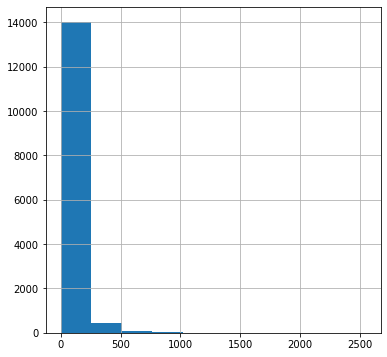

In [ ]:
analysis = data.copy()
plt.figure(figsize=(6,6))
# Returns the number of syllables present
#textstat.syllable_count(data_corpus2['review_body'])
analysis['syllable_count'] = analysis['review_body'].apply(lambda x: textstat.syllable_count(x))
analysis['syllable_count'].hist()

Lexicon Count

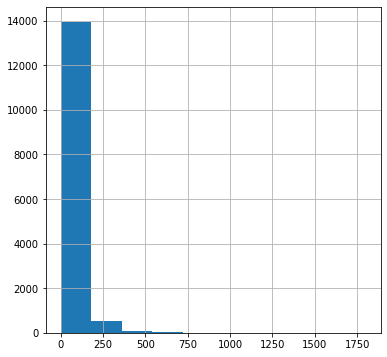

In [ ]:
plt.figure(figsize=(6,6))
#Calculates the number of words present
analysis['lexicon_count'] = analysis['review_body'].apply(lambda x: textstat.lexicon_count(x))
analysis['lexicon_count'].hist()
#textstat.lexicon_count(message_bagwords, removepunct=True)

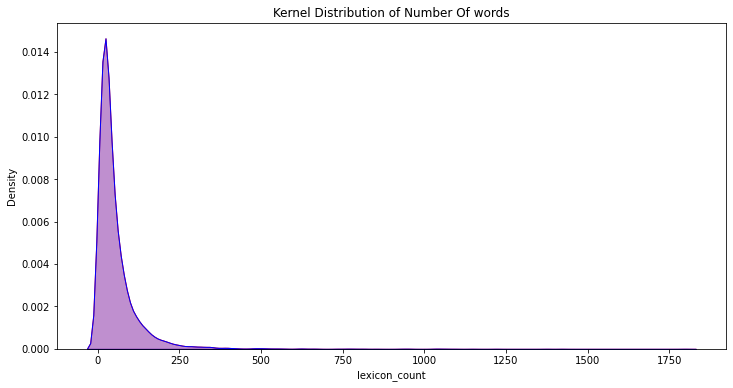

In [ ]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(analysis['lexicon_count'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(analysis['lexicon_count'], shade=True, color="b")

Sentence Count

In [ ]:
#Returns the number of sentences present
#textstat.sentence_count(text)
analysis['sentence_count'] = analysis['review_body'].apply(lambda x: textstat.sentence_count(x))


The Flesch Reading Ease formula

In [ ]:
#Returns the Flesch Reading Ease Score
#textstat.flesch_reading_ease(text)
analysis['flesch_reading'] = analysis['review_body'].apply(lambda x: textstat.flesch_reading_ease(x))


Automated Readability Index

In [ ]:
#Returns the ARI (Automated Readability Index) which outputs a number that approximates the grade level needed to comprehend the text.
#textstat.automated_readability_index(text)
analysis['automated_readability'] = analysis['review_body'].apply(lambda x: textstat.automated_readability_index(x))


Linsear Write Formula

In [ ]:
#Returns the grade level using the Linsear Write Formula
#textstat.linsear_write_formula(text)
analysis['linsear_write_formula'] = analysis['review_body'].apply(lambda x: textstat.linsear_write_formula(x))


Dale-Chall Readability Score

In [ ]:
 #lookup table of the most commonly used 3000 English words
#textstat.dale_chall_readability_score(text)
analysis['dale_chall_readability_score'] = analysis['review_body'].apply(lambda x: textstat.dale_chall_readability_score(x))


Readability Consensus based upon all the above tests

In [ ]:
#returns the estimated
#textstat.text_standard(text, float_output=False)
analysis['text_standard'] = analysis['review_body'].apply(lambda x: textstat.textstat.text_standard(x))


In [ ]:
analysis['char_count'] = analysis['review_body'].apply(len)
analysis['word_count'] = analysis['review_body'].apply(lambda x: len(x.split()))
analysis['word_density'] = analysis['char_count'] / (analysis['word_count']+1)
analysis['punctuation_count'] = analysis['review_body'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
analysis['title_word_count'] = analysis['review_body'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
analysis['upper_case_word_count'] = analysis['review_body'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
analysis.head()

,review_body,star_rating,syllable_count,lexicon_count,sentence_count,flesch_reading,automated_readability,linsear_write_formula,dale_chall_readability_score,text_standard,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
0,Good luck finding a reasonably priced band rep...,1,78,61,3,76.25,9.0,7.875000,6.71,6th and 7th grade,324,61,5.225806,8,5,3
1,No i get dark on the first week with me!! I wi...,1,24,23,2,110.56,-1.5,4.750000,0.57,0th and 1st grade,92,23,3.833333,2,2,1
2,I dont know if mine was a mistake but it clear...,1,99,77,5,81.22,5.9,4.928571,6.25,5th and 6th grade,398,77,5.102564,9,7,2
3,The rod that holds the bracelet broke several ...,1,57,47,3,89.38,4.3,8.166667,1.11,4th and 5th grade,224,47,4.666667,8,5,1
4,"I bought 2 watches , one watch doesnot work at...",1,73,54,4,74.69,6.4,6.500000,6.06,6th and 7th grade,298,56,5.228070,10,5,3


In [ ]:
analysis.to_csv('analysis.csv')

In [ ]:
#looking  at the distribution of feedback in this data_corpus data
feedback_dist = bag_of_words.groupby('sentiment').count()['review_body'].reset_index().sort_values(by='review_body',ascending=False)
feedback_dist.style.background_gradient(cmap='Purples')

,sentiment,review_body
1,Positive,9300
0,Negative,2109


observation: there is more positive customer reviews compared to

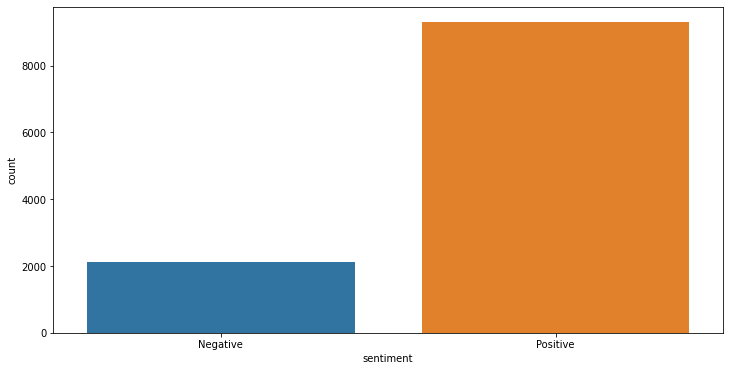

In [ ]:
plt.figure(figsize=(12,6))     #width and height
sns.countplot(x='sentiment',data=bag_of_words)

observation: there is more positive customer reviews compared to negative.

In [ ]:
#visualizing sentiments with funnel charts
#
#checking sentiment distribution
from plotly import graph_objs as go
# Create distribution plot with custom bin_size
fig.update_layout(title_text='Distribution of Number Of reviews')
fig.update_layout(
    autosize=False,
    width=700,
    height=600,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

observation: postive feedbacks translates to 81.5% of the total feedback 

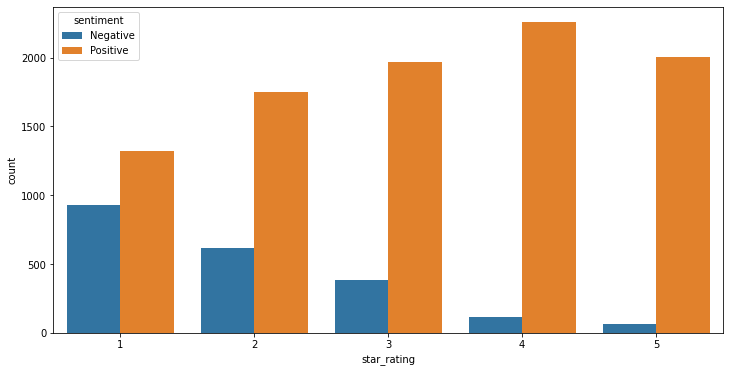

In [ ]:
plt.figure(figsize=(12,6))     #width and height
sns.countplot(x='star_rating', data = bag_of_words, hue='sentiment')

observation; 

Star rating of 1 had the highest negative review followed bt star rating of 2.

star rating of 4 and 5 had the lowest negative words in their review. this is expected as the customer can have a few pointer even if he is satisfied with the product.


In [ ]:
Positive_sent = bag_of_words[bag_of_words['sentiment']=='Positive']
Negative_sent = bag_of_words[bag_of_words['sentiment']=='Negative']

In [ ]:
#MosT common positive words
from collections import Counter
top = Counter([item for sublist in Positive_sent['selected_text'] for item in sublist])
review_positive = pd.DataFrame(top.most_common(20))
review_positive.columns = ['Common_positive_words','count']
review_positive.style.background_gradient(cmap='Greens')

,Common_positive_words,count
0,second hand,122
1,watch band,107
2,great watch,99
3,nice watch,90
4,good watch,83
5,good time,82
6,small wrist,80
7,great price,70
8,love watch,61
9,new watch,59


In [ ]:
#visualizing the most common words.
import plotly.express as px
fig = px.bar(review_positive, 
             x="count", 
             y="Common_positive_words", 
             title='Commmon Words in review', 
             orientation='h', 
             width=700, height=700,color='Common_positive_words')
fig.show()

In [ ]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['selected_text'] for item in sublist])
freq_negative = pd.DataFrame(top.most_common(20))
freq_negative = temp_negative.iloc[1:,:]
freq_negative.columns = ['Common_negative_words','count']
freq_negative.style.background_gradient(cmap='Reds')

,Common_negative_words,count
2,time,765
3,band,621
4,one,609
5,battery,467
6,would,402
7,look,366
8,day,363
9,work,355
10,get,341
11,back,309


In [ ]:
#visualizing the most common negative words.
import plotly.express as px
fig = px.bar(freq_negative, x="count", y="Common_negative_words", title='Commmon Negative Words in review', orientation='h', 
             width=700, height=700,color='Common_negative_words')
fig.show()

observation: looking at the common words of each sentiments, we now get much clarity about the data. these words are very strong determiners of sentiment of reviews. 





## Generating Meta-Features
This is designed to extract general properties that are able to characterize datasets and give us further understanding of the data


we will use difference In Number Of word review  and  Selected_review_text.

In [ ]:
#checking the number of words in each review

bag_of_words['Num_word_review'] = bag_of_words['review_body'].apply(lambda x:len(str(x).split())) #Number Of words in main text
bag_of_words['Num_review_select'] = bag_of_words['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
bag_of_words['difference_in_words'] = bag_of_words['Num_word_review'] - bag_of_words['Num_review_select'] #Difference in Number of words text and Selected Text
bag_of_words

,star_rating,review_body,selected_text,sentiment,Num_word_review,Num_review_select,difference_in_words
0,1,good luck finding reasonably priced band repla...,"[band replacement, band dealer, unique watch d...",Negative,38,7,31
1,1,dont know mine wa mistake clearly state aqua i...,"[confused mine, irritated people, late one, mu...",Negative,43,9,34
2,1,rod hold bracelet broke several time company f...,"[hold bracelet, company fix sitting drawer]",Negative,23,6,17
3,1,bought watch one watch doe work watch run time...,"[run time, online money time]",Negative,30,5,25
4,1,watch would fantastic nt hard set actually wor...,"[hour minute, point light, little extra money,...",Positive,52,9,43
...,...,...,...,...,...,...,...
11404,5,took heavy duty trip israel abused quite bit m...,[heavy duty trip],Positive,11,3,8
11405,5,absolutely adore watch get many compliment wat...,"[many watch, luminous gold finish, catch people]",Positive,15,7,8
11406,5,tag heuer carrera twin time watch whose watchb...,"[due sweat weather, tag replacement price, inn...",Positive,63,9,54
11407,5,hard sometimes judge product picture watch pre...,"[product picture, look price, old watch batter...",Positive,67,26,41


In [ ]:
hist_data = [bag_of_words['Num_word_review'],bag_of_words['Num_review_select']]

group_labels = ['selected_text', 'review_body']

import plotly.figure_factory as ff
# Create distribution plot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=True)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

observation: The number of word distribution is skewed to the right since we have very less review  with words greater than 50. Skewness is a measure of symmetry of the probability distribution.

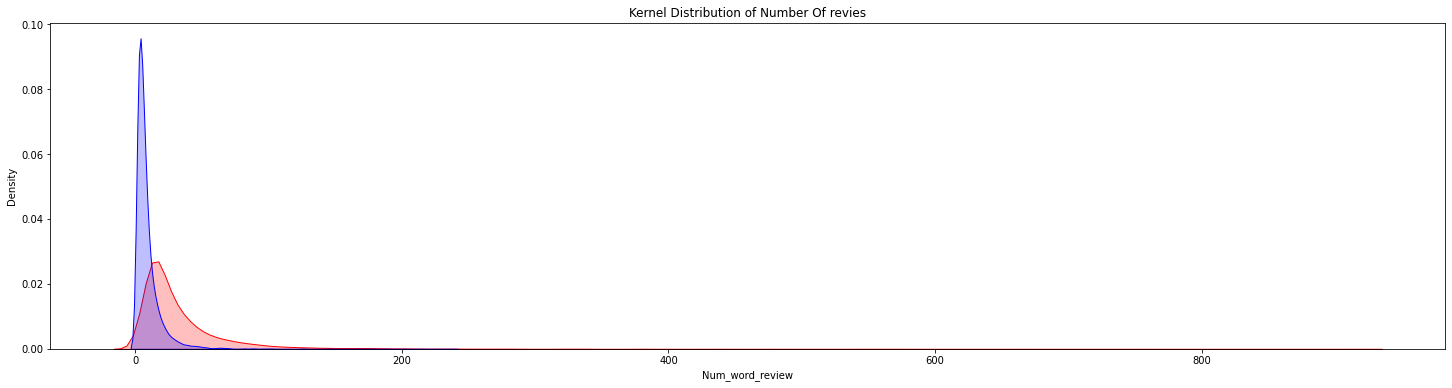

In [ ]:
plt.figure(figsize=(25,6))
p1=sns.kdeplot(bag_of_words['Num_word_review'], shade=True, color="r").set_title('Kernel Distribution of Number Of revies')
p1=sns.kdeplot(bag_of_words['Num_review_select'], shade=True, color="b")

Observation: review words are skewed to the right. 

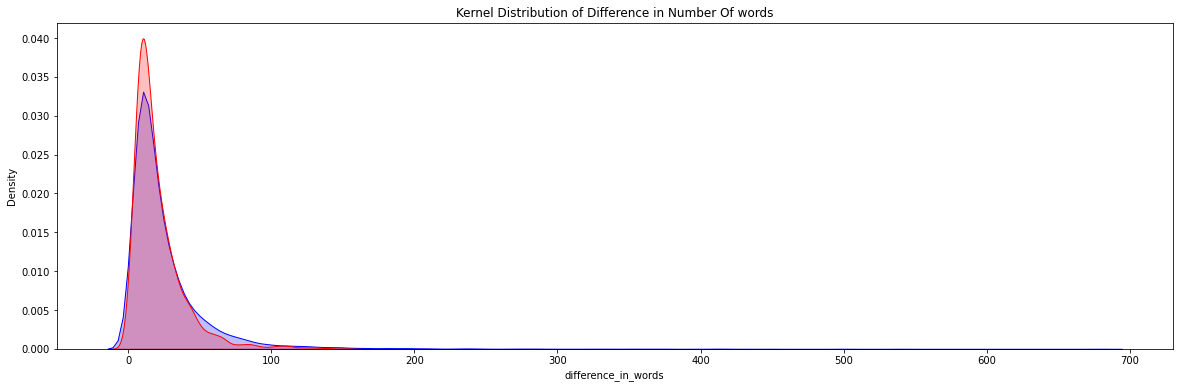

In [ ]:
plt.figure(figsize=(20,6))
p1=sns.kdeplot(bag_of_words[bag_of_words['sentiment']=='Positive']['difference_in_words'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(bag_of_words[bag_of_words['sentiment']=='Negative']['difference_in_words'], shade=True, color="r")

observation: No major difference between number of words in negative and positive sentiments as they are both skewed to the right. 
plot that there is peak for negative and positive plot around 30.

## Word Cloud

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [ ]:
def word_the_cloud(sentiment,rating):
  if (sentiment=="all")&(rating=="all"):
    words =' '.join([text for text in bag_of_words['review_body']])
  elif (sentiment=="none"):
    words =' '.join([text for text in bag_of_words['review_body'][(bag_of_words['star_rating'] == rating)]])
  elif (rating=="none"):
    words =' '.join([text for text in bag_of_words['review_body'][(bag_of_words['sentiment'] == sentiment)]])
  else:
    words =' '.join([text for text in bag_of_words['review_body'][(bag_of_words['star_rating'] == rating)&(bag_of_words['sentiment'] == sentiment)]])


  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

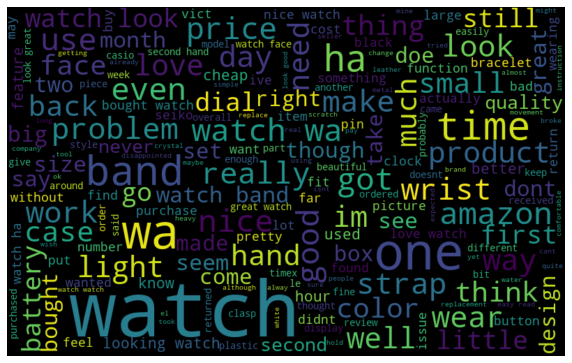

In [ ]:
word_the_cloud("all","all")

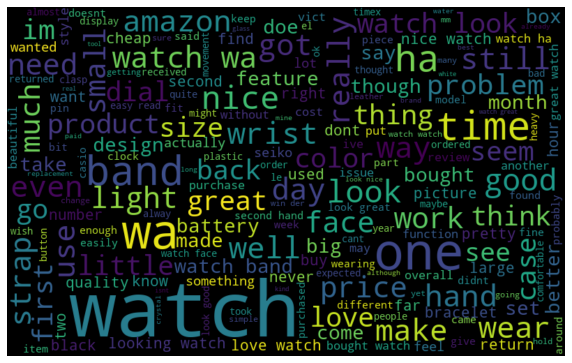

In [ ]:
word_the_cloud("Positive","none")

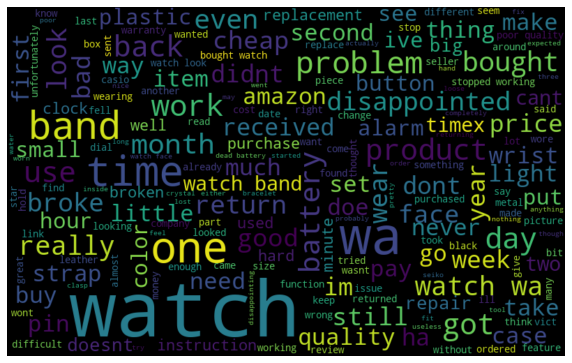

In [ ]:
word_the_cloud("Negative","none")